#데이터 : 
-산불 예측 (Forest Fires Data Set) </br>
#데이터 선정 이유 : 
-산불 피해 규모를 예측하고 대응할 수 있다. </br>
-자연을 보호하고 적절한 대응으로 추가 피해 확산을 방지한다. </br>
-새로운 column에 영향을 받을 가능성이 적다. (자연의 순리를 따르기 때문에 복잡도가 높지 않을 것으로 예상.)

In [319]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/forestfires.csv'
df = pd.read_csv(filename)
df.head()

# X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# month - month of the year: "jan" to "dec"
# day - day of the week: "mon" to "sun"
# FFMC - FFMC index from the FWI system: 18.7 to 96.20    : 땅 속 쓰레기 및 기타 발화가능 물질(미세 연료)의 수분 함량.(높을수록 발화x)(http://aqua.upc.es/anywhere-catalogue-v2/?product=fine-fuel-moisture-code)
# DMC - DMC index from the FWI system: 1.1 to 291.3       : 지표층(표층 연료 층) 습도
# DC - DC index from the FWI system: 7.9 to 860.6         : 계절적인 가뭄정도
# ISI - ISI index from the FWI system: 0.0 to 56.10       : 초기 확산지수((Initial Spread Index) : 기온과 상대습도, 풍속, 강우량을 이용하여 얻은값.
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4
# area - the burned area of the forest (in ha): 0.00 to 1090.84
# (this output variable is very skewed towards 0.0, thus it may make
# sense to model with the logarithm transform).
# Missing Attribute Values: None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [320]:
target = 'area'   ## area : 피해면적(규모), 단위 ha(1헥타르 = 10000제곱미터)

# from pandas_profiling import ProfileReport
# # !pip install --upgrade pandas

# # !pip install pandas-profiling[notebook]
# # !pip install -U pandas-profiling      ## update하기.
# report = ProfileReport(df)
# report    ## categorical 한 columns : Type, Method, Regionname, CouncilArea ; (4개)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


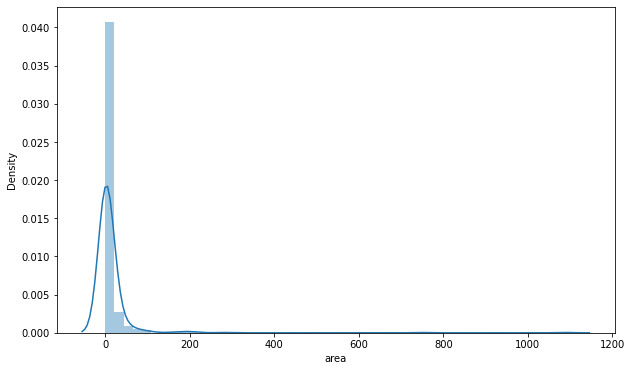

In [321]:
## target분포 확인
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df[target])      ## skewed된 값. -> log1p

0.41871033485818504


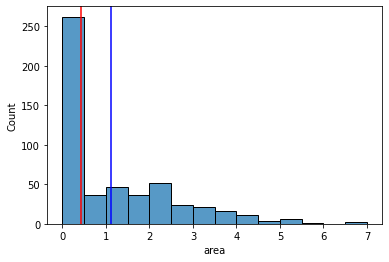

In [322]:
import numpy as np

target_log = np.log1p(df[target])   ## log1p= ln(1 + x)  ;  np.log(df[target]+1)

df['area_log'] = target_log
sns.histplot(target_log);
plt.axvline(df['area_log'].median(), color='red');    ## 변환해도 target이 skewed된 분포이기 때문에, 정규분포에 가깝도록 median을 기준라인으로 잡겠습니다.
plt.axvline(df['area_log'].mean(), color='blue')
print(df['area_log'].median())

In [323]:
target = 'area_log'
df = df.drop(columns=['area'])    ## target의 최대 최소 분포 차가 너무 커서 log값을 씌워 차이를 완화해줌.

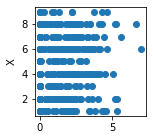

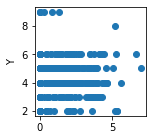

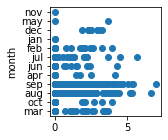

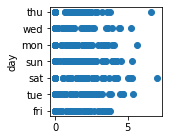

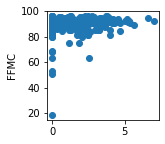

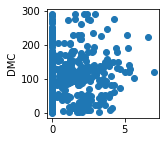

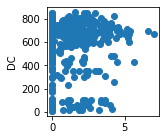

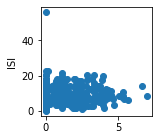

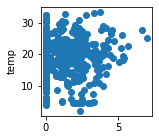

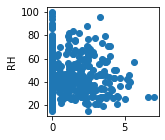

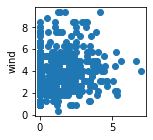

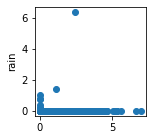

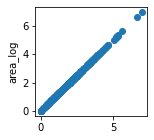

In [324]:
## target과 feature간 상관관계 확인.

df.corr().iloc[:,-1].sort_values(ascending = False)

for i in df.columns:
  f, ax = plt.subplots(figsize=(2,2))
  plt.ylabel(i)
  ax.scatter(df['area_log'], df[i])

In [325]:
# sns.set(style='whitegrid', context='notebook')
# sns.pairplot(df.columns, height=2)

In [326]:
## 각 column data 확인.
for i in df.columns:
  print(i, df[i].unique())

X [7 8 6 5 4 2 9 1 3]
Y [5 4 6 3 2 9 8]
month ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
FFMC [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
DMC [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108.3
  82.9  62.3  23.9  52.2 137.   99.6 111.2 114.3  46.5   9.3  13.2

In [327]:
## train, val, test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=2)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)

In [328]:
# 특성공학
def engine(df):
  # df = df.drop(columns=['month','day'], axis=1)
  return df

train = engine(train)
val = engine(val)
test = engine(test)

In [329]:
## X, y split

# feature = train.drop(columns=[target]).columns     ##target = area_log
feature = 'temp'  ##ISI, temp, wind

X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]
X_test = test[feature]
y_test = test[target]

print(len(df), len(X_train), len(X_val), len(X_test))

517 330 83 104


In [330]:
## modeling

# !pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestRegressor()
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.03435215390385671
